In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.simplefilter("ignore")

In [16]:
df = pd.read_csv(r"data\raw\train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,21754,INN21755,2,0,0,3,Meal Plan 1,0,Room_Type 1,314,2018,10,12,Offline,0,0,0,75.00,0,Canceled
1,7011,INN07012,3,0,0,1,Meal Plan 1,0,Room_Type 4,41,2018,9,1,Online,0,0,0,142.20,2,Not_Canceled
2,4008,INN04009,2,0,2,2,Meal Plan 1,0,Room_Type 1,138,2018,4,23,Online,0,0,0,90.95,0,Not_Canceled
3,9600,INN09601,2,1,2,4,Meal Plan 1,0,Room_Type 1,59,2018,7,24,Online,0,0,0,90.51,1,Not_Canceled
4,25652,INN25653,1,0,0,2,Meal Plan 1,0,Room_Type 1,12,2017,10,20,Corporate,0,0,0,130.00,0,Not_Canceled


In [17]:
df.isnull().sum()

Unnamed: 0                              0
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

##### Data is imbalanced

In [20]:
cat_columns = [ 'type_of_meal_plan','required_car_parking_space', 'room_type_reserved', 'market_segment_type',
       'repeated_guest','booking_status']
num_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','lead_time',
       'arrival_year', 'arrival_month', 'arrival_date','no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

##### Data analysis

In [21]:
data = df.copy()

In [22]:
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,21754,INN21755,2,0,0,3,Meal Plan 1,0,Room_Type 1,314,2018,10,12,Offline,0,0,0,75.00,0,Canceled
1,7011,INN07012,3,0,0,1,Meal Plan 1,0,Room_Type 4,41,2018,9,1,Online,0,0,0,142.20,2,Not_Canceled
2,4008,INN04009,2,0,2,2,Meal Plan 1,0,Room_Type 1,138,2018,4,23,Online,0,0,0,90.95,0,Not_Canceled
3,9600,INN09601,2,1,2,4,Meal Plan 1,0,Room_Type 1,59,2018,7,24,Online,0,0,0,90.51,1,Not_Canceled
4,25652,INN25653,1,0,0,2,Meal Plan 1,0,Room_Type 1,12,2017,10,20,Corporate,0,0,0,130.00,0,Not_Canceled


##### Univariate Analysis

In [23]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15,len(num_features)*5))
    if len(num_features) == 1:
        axes[axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()


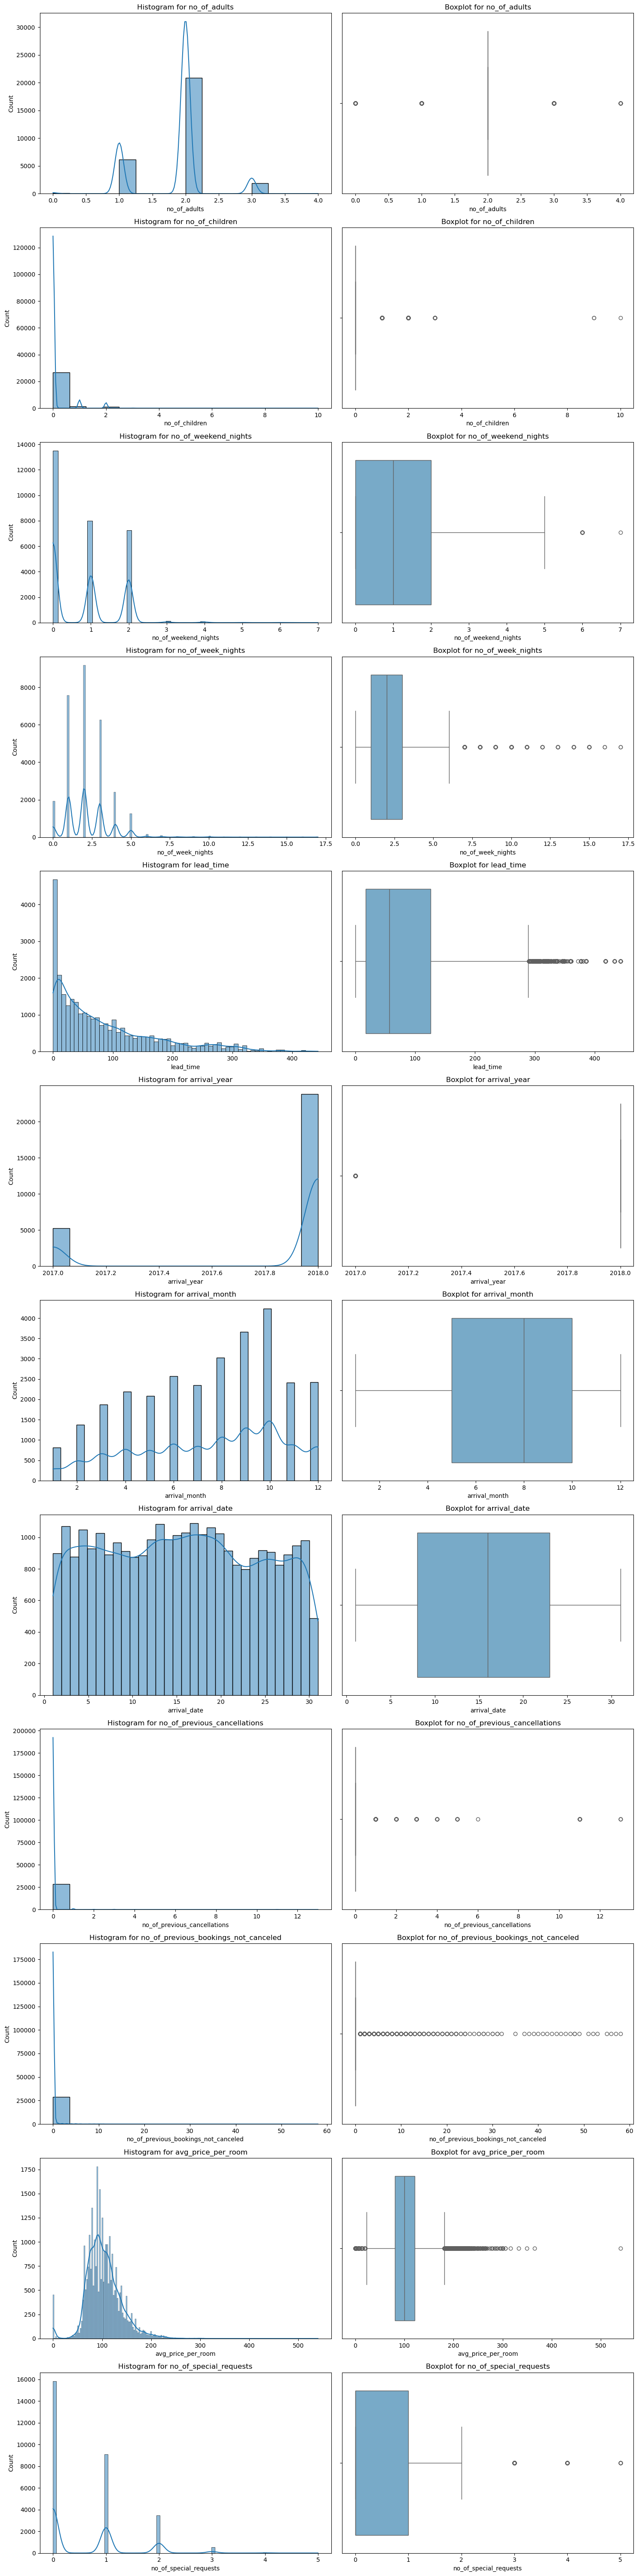

In [24]:
num_plot_dist(data, num_columns)

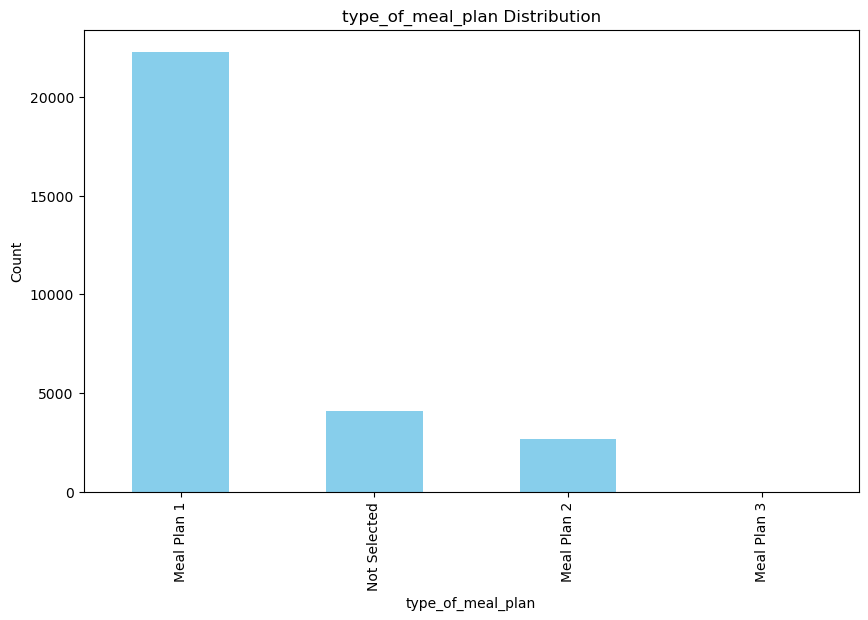

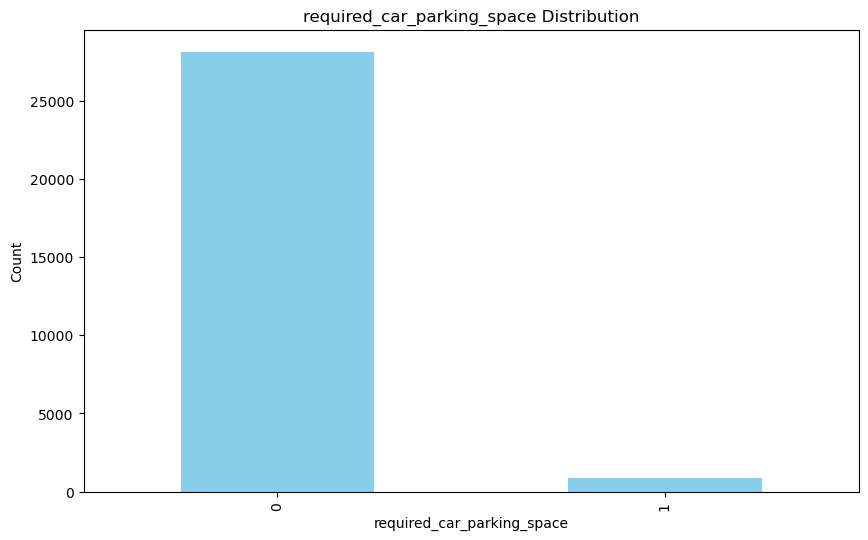

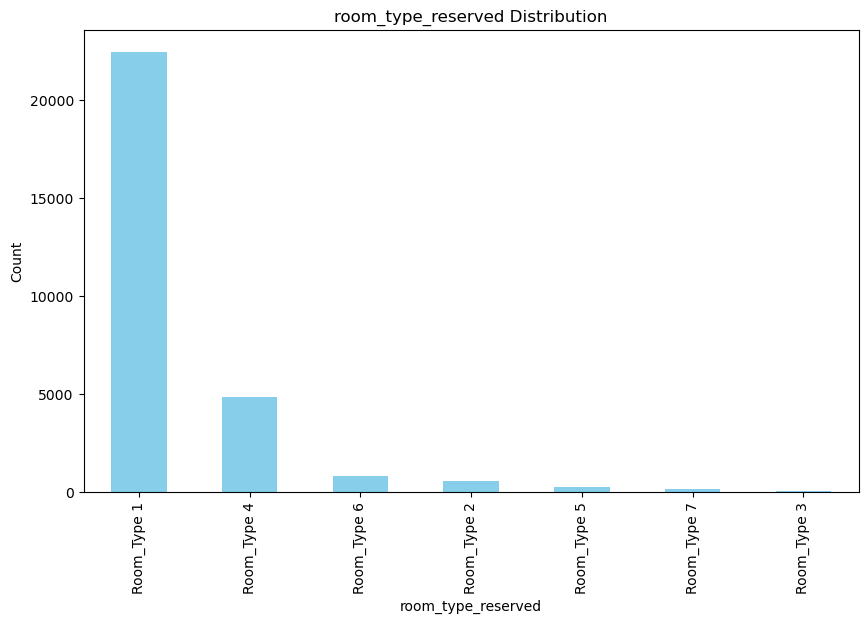

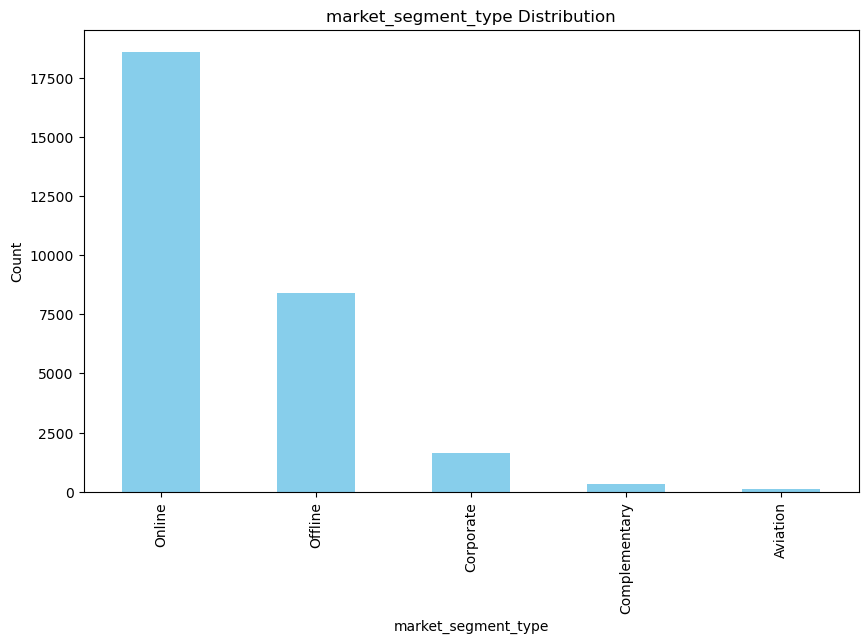

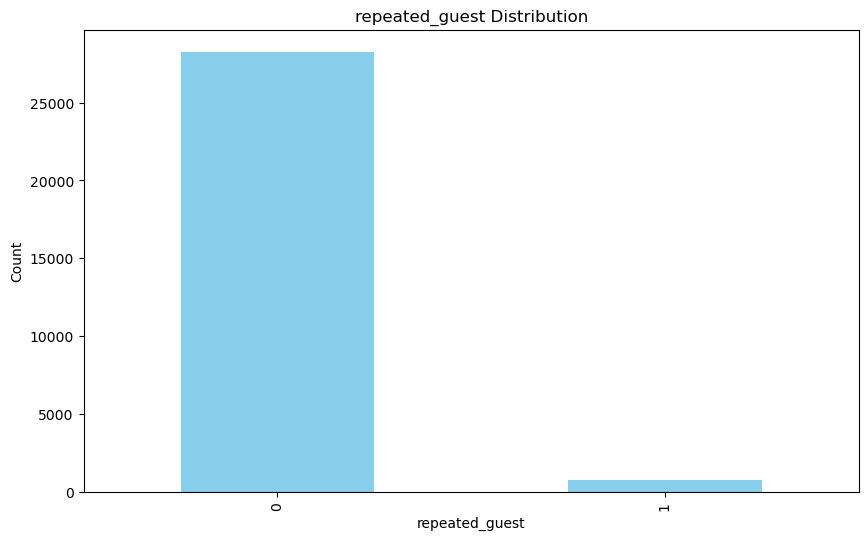

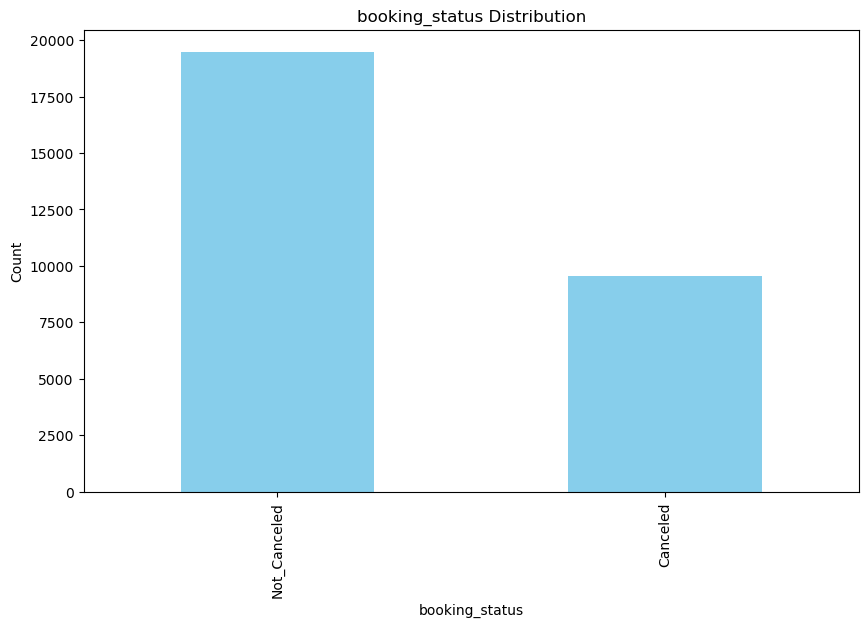

In [25]:
for cat_featues in cat_columns:
    plt.figure(figsize=(10,6))
    data[cat_featues].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_featues} Distribution")
    plt.xlabel(cat_featues)
    plt.ylabel("Count")
    plt.show()

##### Bivariate Analysis

In [26]:
def plot_biavariate_num(df,target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots +1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize = (15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i],data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()


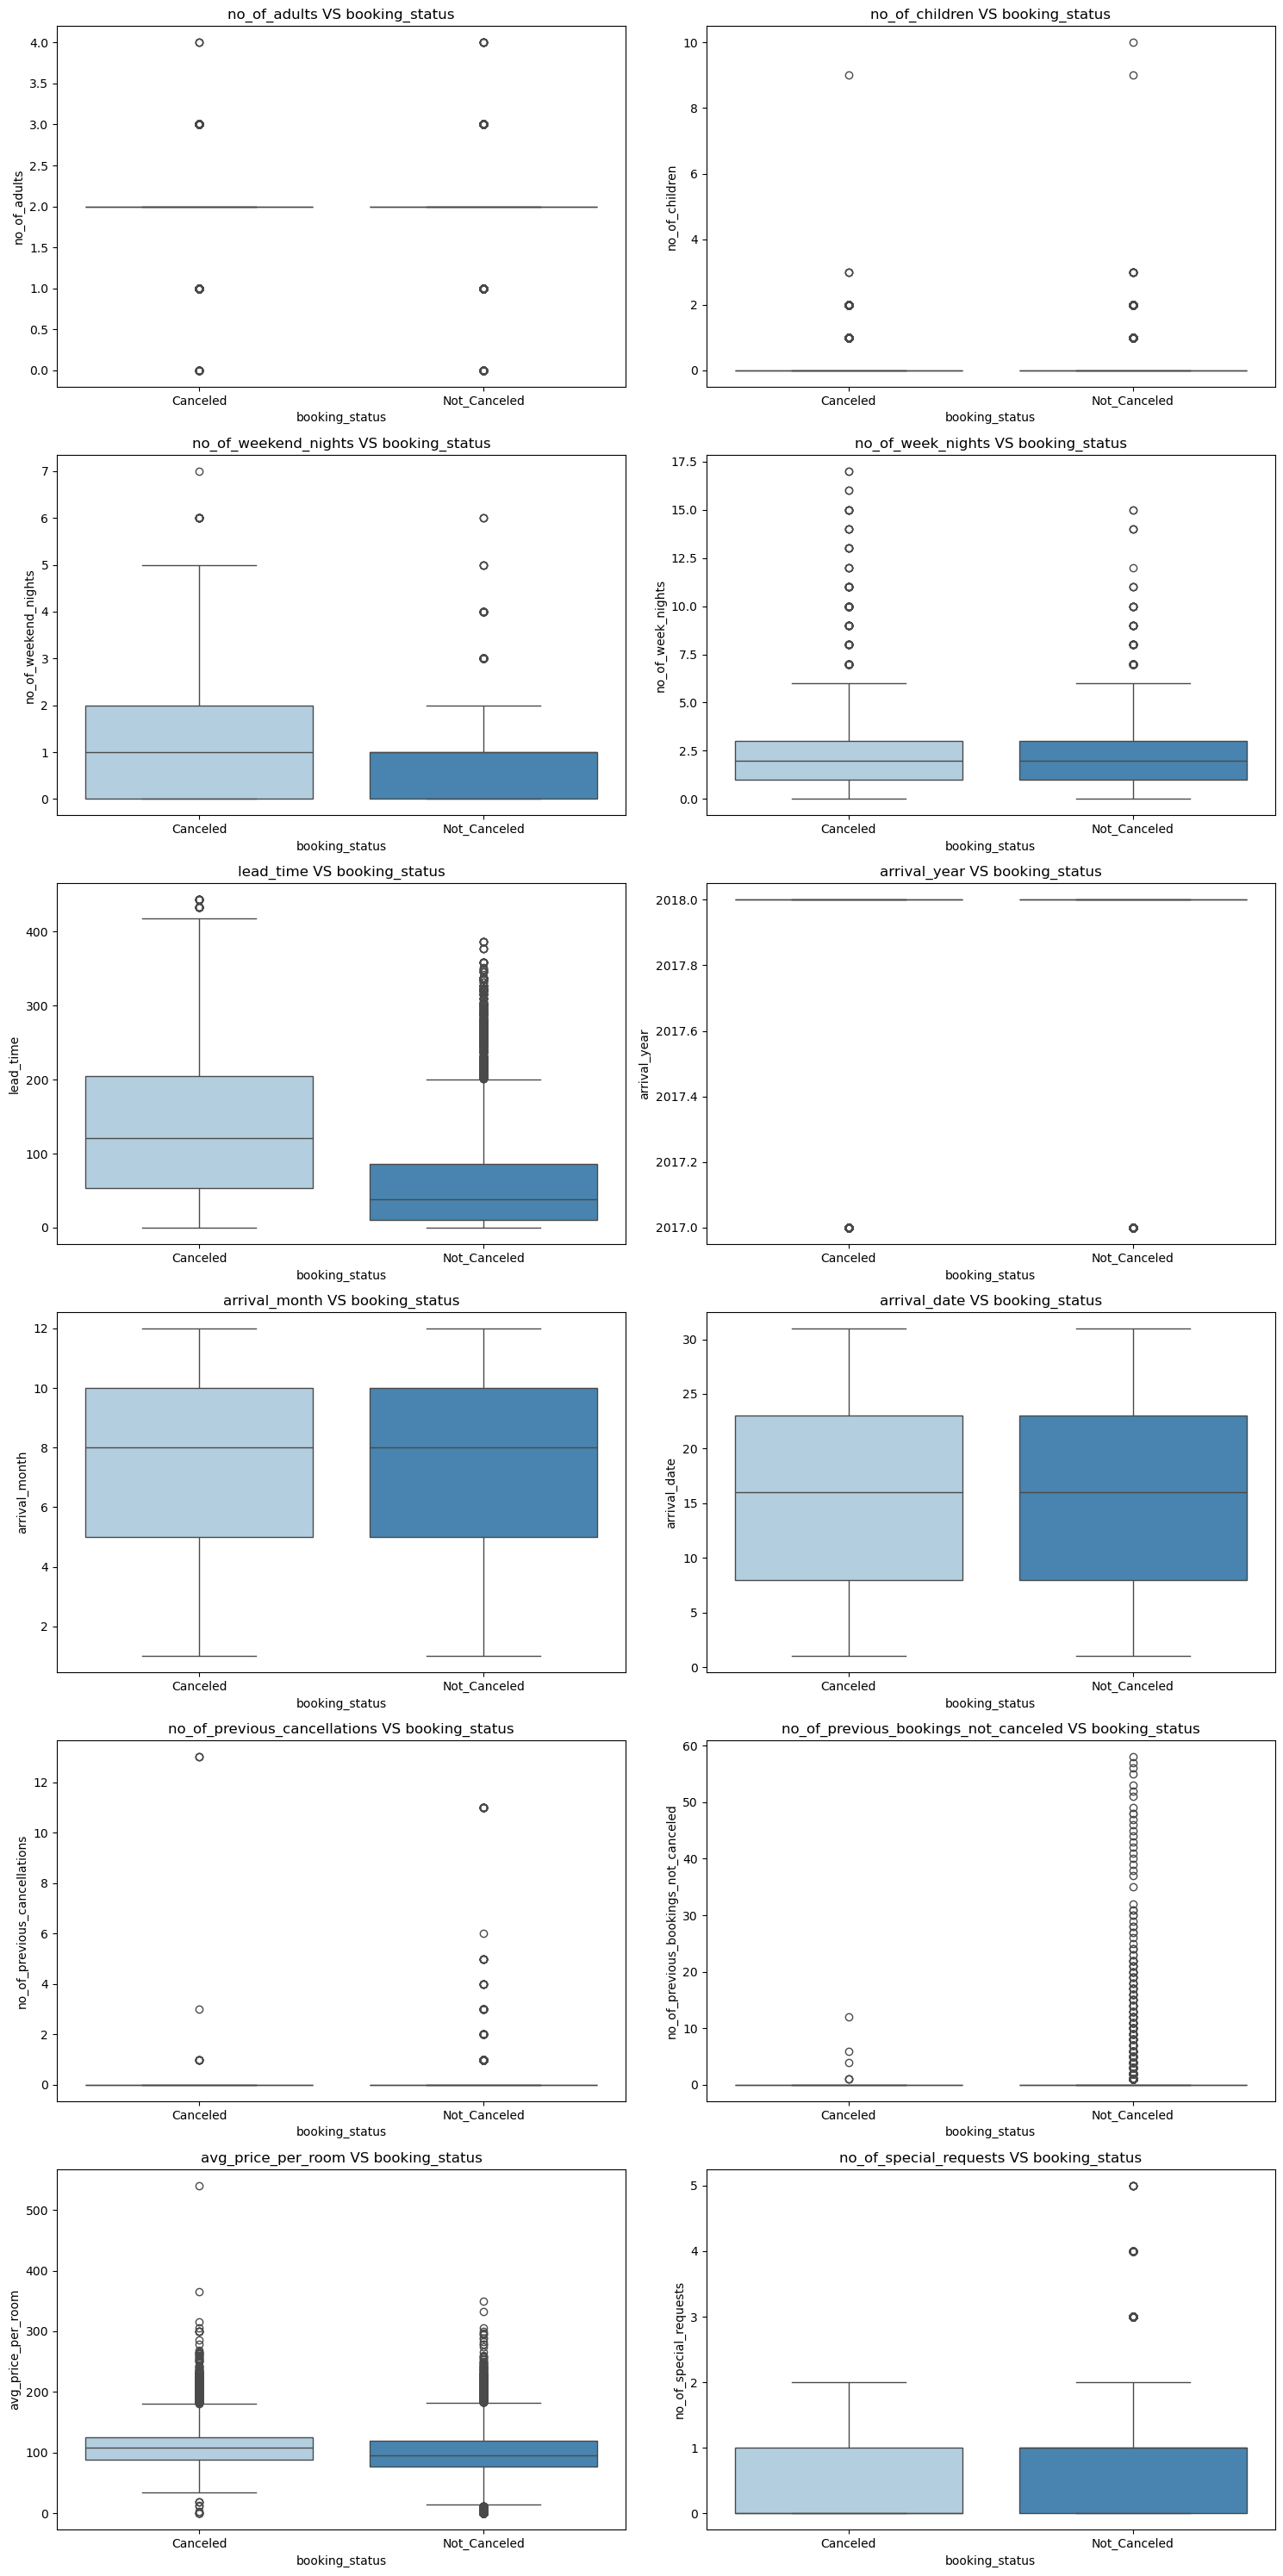

In [27]:
plot_biavariate_num(data, 'booking_status', num_columns)

In [28]:
def plot_biavariate_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots +1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize = (15,num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


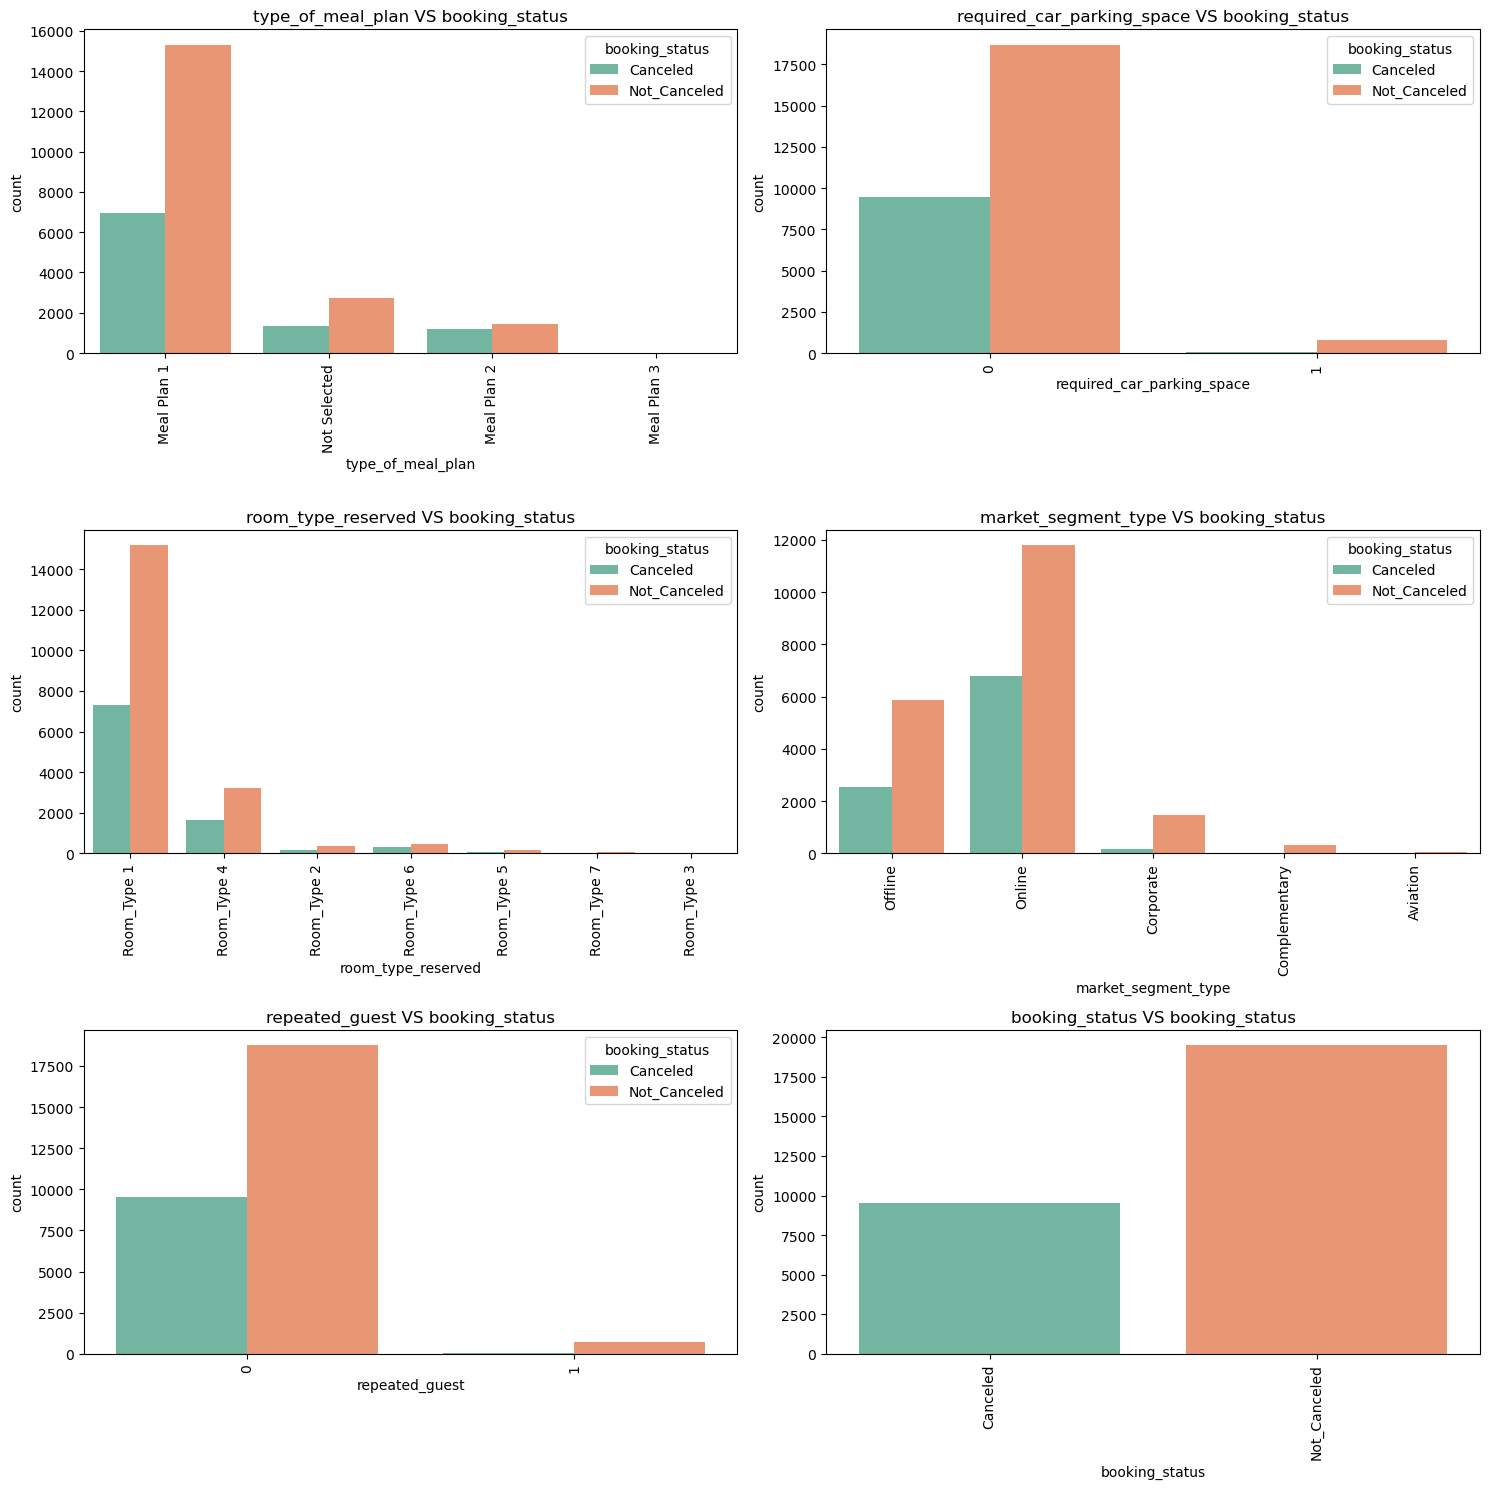

In [29]:
plot_biavariate_cat(data, 'booking_status', cat_columns)